### Social Analytics Homework Observations (HW-7)

1.  Most neutral news sources seem to be Fox based on overall. 

2.  From scatter plot, CNN and the New York Times seems to have a lot of tweets that are negative, but CBS seems to have a lot of tweets that are positive.

3.  Overall, if all of the media outlets are reporting on the same news topics, then the way that the 
    tweets are written seems to have a significant impact on the sentiment of each individual feed.

In [1]:
import tweepy
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from twitter_keys import Access_Token, Access_Token_Secret, Consumer_Key, Consumer_API_Secret

In [2]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
bbc_tweet_text = []
for x in range(5):
    public_tweets = api.user_timeline('@bbc', page = x)
    for tweet in public_tweets:
        bbc_tweet_text.append(tweet['text'])
        
analyzer = SentimentIntensityAnalyzer()

bbc_compound_score= []
for text_ in bbc_tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    bbc_compound_score.append(score)

In [4]:
cnn_tweet_text = []
for x in range(5):
    public_tweets = api.user_timeline('@cnn', page = x)
    for tweet in public_tweets:
        cnn_tweet_text.append(tweet['text'])

cnn_compound_score= []
for text_ in cnn_tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    cnn_compound_score.append(score)

In [5]:
nyt_tweet_text = []
for x in range(5):
    public_tweets = api.user_timeline('@nyt', page = x)
    for tweet in public_tweets:
        nyt_tweet_text.append(tweet['text'])
        
nyt_compound_score= []
for text_ in nyt_tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    nyt_compound_score.append(score)

In [6]:
cbs_tweet_text = []
for x in range(5):
    public_tweets = api.user_timeline('@cbs', page = x)
    for tweet in public_tweets:
        cbs_tweet_text.append(tweet['text'])
        
cbs_compound_score = []
for text_ in cbs_tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    cbs_compound_score.append(score)

In [7]:
fox_tweet_text = []
for x in range(5):
    public_tweets = api.user_timeline('@foxnews', page = x)
    for tweet in public_tweets:
        fox_tweet_text.append(tweet['text'])
        
fox_compound_score = []
for text_ in fox_tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    fox_compound_score.append(score)

In [8]:
data_dict = {'cnn_text': cnn_tweet_text, 'cnn_score': cnn_compound_score, 
             'nyt_text': nyt_tweet_text, 'nyt_score': nyt_compound_score,
             'cbs_text': cbs_tweet_text,  'cbs_score': cbs_compound_score,
             'fox_text': fox_tweet_text, 'fox_score': fox_compound_score,
            'bbc_text': bbc_tweet_text, 'bbc_score': bbc_compound_score}

In [9]:
df = pd.DataFrame(data_dict)
df.to_csv('data.csv')
df.head()

,bbc_score,bbc_text,cbs_score,cbs_text,cnn_score,cnn_text,fox_score,fox_text,nyt_score,nyt_text
0,-0.0258,These adorable alpacas are helping people to r...,0.8016,Star power makes these commercials instant cla...,-0.5574,2017 was the most expensive year on record for...,0.2263,".@RandPaul: ""If there were ever something wort...",0.0000,Getting a Roommate in Your Golden Years. https...
1,-0.7845,The day I accidentally killed a little boy. ht...,0.7717,Four-time GRAMMY® winner @KeithUrban inspires ...,0.0000,The Trump administration is about to start let...,-0.7003,.@wikileaks founder @JulianAssange's poor hygi...,-0.3818,"Timberwolves 118, Knicks 108: Knicks Falter on..."
2,-0.7506,"In the endless winter night, terrifying monste...",0.0000,Here's why @startrekcbs needs to be your next ...,-0.5994,This year marks the 50th anniversary of the Re...,0.2732,California man cops to quarter-century-old sla...,0.0000,What’s on TV Saturday: Sam Rockwell Hosts ‘S.N...
3,-0.4404,"Tonight, @CharltonBrooker, @ScarlettMoffatt an...",0.5550,RT @Elementary_CBS: Your favorite detective du...,0.5106,"North Korea is sending athletes, a cheering sq...",0.5106,"Yesterday, at a @WhiteHouse event honoring Mar...",0.5994,"To New Yorkers’ Delight, Coogan’s Says It Isn’..."
4,0.4404,'Kids are easy to manage... you just lie to th...,0.0000,RT @CodeBlackCBS: Return to Angels Memorial on...,-0.8074,"Michael Wolff's book ""Fire and Fury: Inside th...",0.6115,".@CortesSteve: ""[@TheDemocrats] are very happy...",0.0000,"John V. Tunney, Boxer’s Son Who Lasted One Ter..."


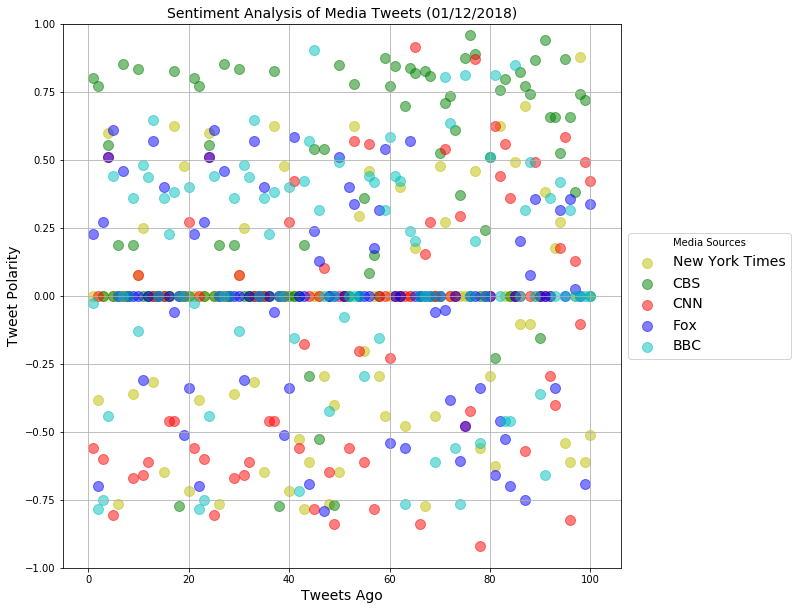

In [10]:
x1 = np.arange(1, len(nyt_compound_score)+1)
y1 = nyt_compound_score

x2 = np.arange(1, len(cbs_compound_score)+1)
y2 = cbs_compound_score

x3 = np.arange(1, len(cnn_compound_score) +1)
y3 = cnn_compound_score

x4 = np.arange(1, len(fox_compound_score) + 1)
y4 = fox_compound_score

x5 = np.arange(1, len(bbc_compound_score)+ 1)
y5 = bbc_compound_score

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.scatter(x1, y1, marker = 'o', c='y', alpha = 0.5, s = 100, label = 'New York Times')
ax1.scatter(x2, y2, marker = 'o', c='g', alpha = 0.5, s = 100, label = 'CBS')
ax1.scatter(x3, y3, marker = 'o', c='r', alpha = 0.5, s = 100, label = 'CNN')
ax1.scatter(x4, y4, marker = 'o', c='b', alpha = 0.5, s = 100, label = 'Fox')
ax1.scatter(x5, y5, marker = 'o', c='c', alpha = 0.5, s = 100, label = 'BBC')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Media Sources', fontsize = 14)
plt.grid(True)
plt.ylim(-1.0, 1.0, 0.25)
plt.title('Sentiment Analysis of Media Tweets (01/12/2018)', fontsize = 14)
plt.xlabel('Tweets Ago', fontsize = 14)
plt.ylabel('Tweet Polarity', fontsize = 14)
plt.show()

In [11]:
cbs_mean = np.mean(cbs_compound_score)
cnn_mean = np.mean(cnn_compound_score)
fox_mean = np.mean(fox_compound_score)
bbc_mean = np.mean(bbc_compound_score)
nyt_mean = np.mean(nyt_compound_score)

x = np.arange(5)
scores = [cbs_mean, cnn_mean, fox_mean, bbc_mean, nyt_mean]

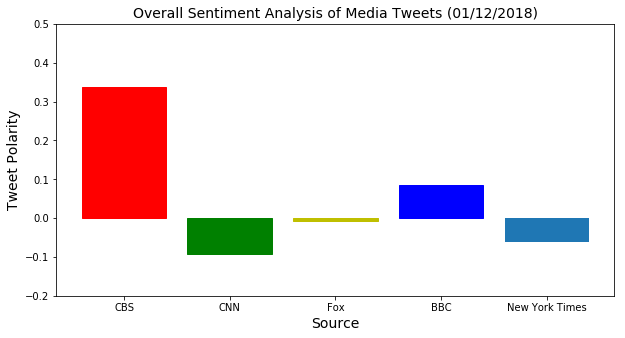

In [12]:
plt.figure(figsize=(10, 5))
bar_plot = plt.bar(x, scores)
plt.xticks(x, ('CBS', 'CNN', 'Fox', 'BBC', 'New York Times'))
plt.title('Overall Sentiment Analysis of Media Tweets (01/12/2018)', fontsize = 14)
plt.xlabel('Source', fontsize = 14)
plt.ylabel('Tweet Polarity', fontsize = 14)
plt.ylim(-0.2, 0.5, 0.1)
bar_plot[0].set_color('r')
bar_plot[1].set_color('g')
bar_plot[2].set_color('y')
bar_plot[3].set_color('b')
plt.show()